In [17]:
import os

# os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
from collections import Counter
import numpy.ma as ma
import os
import time

import pandas as pd
# from lmfit.models import GaussianModel, Model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import mixture, metrics

# from shapely.geometry import Polygon


from PIL import Image, ImageDraw, ImageFilter, ImageOps
import copy
import cv2
import os
import sys

from skimage.measure import approximate_polygon

import matplotlib.pyplot as plt
from copy import copy

# from radio_beam.commonbeam import getMinVolEllipse
#
from utils import grainPreprocess, grainShow, grainMark, grainDraw, grainApprox, grainStats, grainMorphology,grainGenerate


from tqdm.notebook import tqdm
import json

import cv2

from collections import Counter

from numba import jit

In [2]:
step = 2

path = f'data/beams/bc_left_(1536,1536,1)_preprocess_step_{step}_beams.json'

data = open(path, encoding='utf-8')
data = json.load(data)

In [4]:
i=0
cnts = data['data'][i]['contours_series']

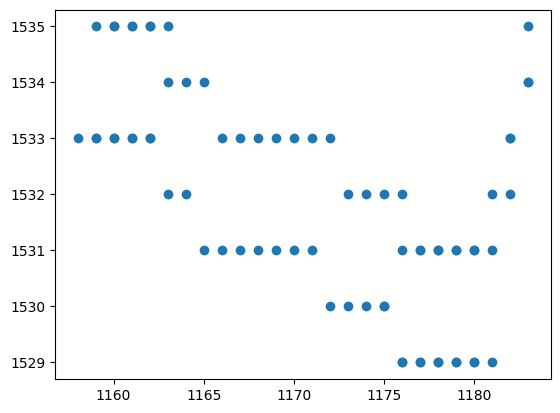

In [25]:
cnt=np.array(cnts[7])
plt.scatter(cnt[:,0], cnt[:,1])

In [26]:
def get_metric(tmp_cnt,new_cnt ):
    return np.sqrt(np.sum(np.power(tmp_cnt-new_cnt,2)))

In [61]:
i=0
cnts = data['data'][i]['contours_series']
cnt=np.array(cnts[7])

eps=0.01
tmp_cnt=copy(cnt)
new_cnt=copy(cnt)
step=0
flag=True

while step<100:
    for i in range(len(tmp_cnt))[:-1]:
        new_cnt[i]=[(tmp_cnt[i,0]+tmp_cnt[i+1,0])/2,(tmp_cnt[i,1]+tmp_cnt[i+1,1])/2]
    print('-----')
    print( np.concatenate([tmp_cnt,new_cnt],axis=1))
    tmp_cnt=copy(new_cnt)
    step+=1
    metrics=get_metric(tmp_cnt,new_cnt)
    print(step,metrics)
    
    if get_metric(tmp_cnt,new_cnt)<eps:
        flag=False


-----
[[1176 1529 1175 1529]
 [1175 1530 1174 1530]
 [1174 1530 1173 1530]
 [1173 1530 1172 1530]
 [1172 1530 1171 1530]
 [1171 1531 1170 1531]
 [1170 1531 1169 1531]
 [1169 1531 1168 1531]
 [1168 1531 1167 1531]
 [1167 1531 1166 1531]
 [1166 1531 1165 1531]
 [1165 1531 1164 1531]
 [1164 1532 1163 1532]
 [1163 1532 1162 1532]
 [1162 1533 1161 1533]
 [1161 1533 1160 1533]
 [1160 1533 1159 1533]
 [1159 1533 1158 1533]
 [1158 1533 1158 1533]
 [1159 1533 1159 1533]
 [1160 1533 1160 1533]
 [1161 1533 1161 1533]
 [1162 1533 1162 1533]
 [1163 1534 1162 1534]
 [1162 1535 1161 1535]
 [1161 1535 1160 1535]
 [1160 1535 1159 1535]
 [1159 1535 1159 1535]
 [1160 1535 1160 1535]
 [1161 1535 1161 1535]
 [1162 1535 1162 1535]
 [1163 1535 1163 1534]
 [1164 1534 1164 1534]
 [1165 1534 1165 1533]
 [1166 1533 1166 1533]
 [1167 1533 1167 1533]
 [1168 1533 1168 1533]
 [1169 1533 1169 1533]
 [1170 1533 1170 1533]
 [1171 1533 1171 1533]
 [1172 1533 1172 1532]
 [1173 1532 1173 1532]
 [1174 1532 1174 1532]
 [117

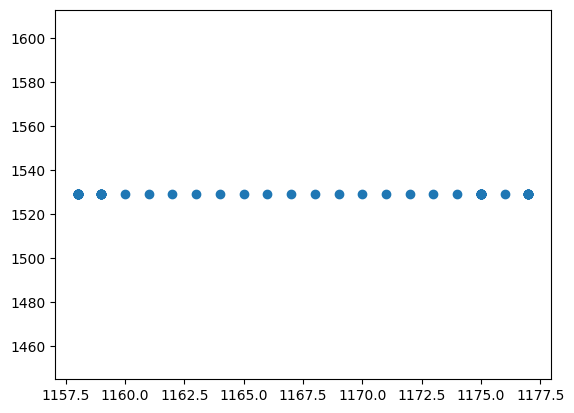

In [62]:
cnt=new_cnt
plt.scatter(cnt[:,0], cnt[:,1])
plt.show()